###Twitter Sarcasm Detection

####Problem Statement:
To implement a Twitter Sarcasm Detection model that helps to overcome the challenges of identifying the Sarcasm in tweets. 

####Imports

In [14]:
import numpy as np
import pandas as pd
import re

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc


import warnings
warnings.filterwarnings("ignore")

####Dataset:
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .




In [3]:
data = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines = True)
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
data["is_sarcastic"] = data["is_sarcastic"].map({0: "Not Sarcasm", 1: "Sarcasm"})
data.head()

,is_sarcastic,headline,article_link
0,Sarcasm,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,Not Sarcasm,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,Not Sarcasm,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,Sarcasm,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,Sarcasm,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  object
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: object(3)
memory usage: 670.9+ KB


In [6]:
#No. of unique categories of tweets
data['is_sarcastic'].nunique()     #the dataset contains Sacastic amd Non-Sarcastic

2

In [7]:
data.shape

(28619, 3)

####Pre-Processing:

In [8]:
#Separating positive and negative tweets
data_pos = data[data['is_sarcastic'] == "Sarcasm"]
data_neg = data[data['is_sarcastic'] == "Not Sarcasm"]

In [9]:
data_pos = data_pos.iloc[:int(10000)]
data_neg = data_neg.iloc[:int(10000)]

In [10]:
tweets = pd.concat([data_pos, data_neg])
tweets

,is_sarcastic,headline,article_link
0,Sarcasm,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
3,Sarcasm,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,Sarcasm,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
7,Sarcasm,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,Sarcasm,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
...,...,...,...
19154,Not Sarcasm,"julianne moore on 'freeheld,' marriage equalit...",https://www.huffingtonpost.com/entry/julianne-...
19156,Not Sarcasm,report: former nfl kicker threatened students ...,https://www.huffingtonpost.com/entry/students-...
19160,Not Sarcasm,princess charlotte is 'bonding' quite a lot wi...,https://www.huffingtonpost.com/entry/princess-...
19162,Not Sarcasm,wwii veteran reunites with his long-lost love ...,https://www.huffingtonpost.comhttp://pubx.co/L...


In [11]:
tweets.shape

(20000, 3)

#####Tokenization

In [12]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tweets['headline'] = tweets['headline'].apply(tokenizer.tokenize)

In [13]:
tweets['headline'].head()

0    [thirtysomething, scientists, unveil, doomsday...
3    [inclement, weather, prevents, liar, from, get...
4    [mother, comes, pretty, close, to, using, word...
7    [richard, branson, s, global, warming, donatio...
8    [shadow, government, getting, too, large, to, ...
Name: headline, dtype: object

#####Lemmatization

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
lm = nltk.WordNetLemmatizer()
def lemmatization(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweets['headline'] = tweets['headline'].apply(lambda x: lemmatization(x))
tweets['headline'].head()

0    [thirtysomething, scientists, unveil, doomsday...
3    [inclement, weather, prevents, liar, from, get...
4    [mother, comes, pretty, close, to, using, word...
7    [richard, branson, s, global, warming, donatio...
8    [shadow, government, getting, too, large, to, ...
Name: headline, dtype: object

####Data Visualization:
Plotting a cloud of words for negative and positive tweets

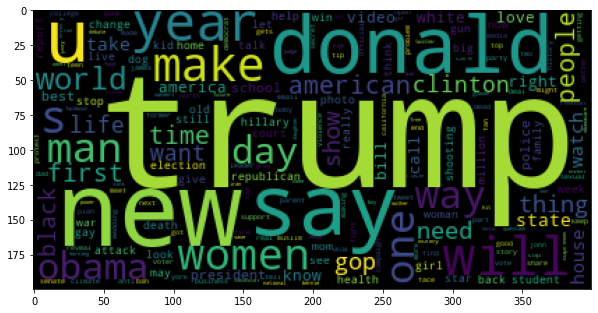

In [17]:
data_neg = data_neg['headline']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 500 ,collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

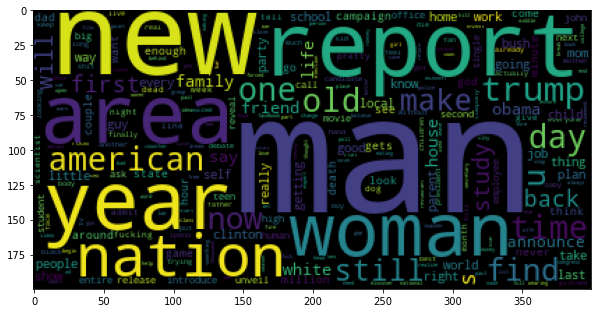

In [18]:
data_pos = data_pos['headline']
wc1 = WordCloud(max_words = 500,collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (10,10))
plt.imshow(wc1)

####Data-Splitting:

In [19]:
#converting token of words to sentence
def join(text):
    text=' '.join(text)
    return text
tweets['headline'] = tweets['headline'].apply(lambda x: join(x))
tweets['headline'].head()

0    thirtysomething scientists unveil doomsday clo...
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word stream...
7    richard branson s global warming donation near...
8    shadow government getting too large to meet in...
Name: headline, dtype: object

In [20]:
X=tweets.headline
y=tweets.is_sarcastic

In [21]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =42)

####Feature Vectorization:
Application of 3 different techniques of feature vectorization on the preprocessed dataset namely: bag of words, bag of ngrams and TF-IDF, and their subsequent comparitive analysis.

#####TF-IDF Vectorizer

In [22]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2))

In [23]:
#Transforming the data
X_train1 = tfidf.transform(X_train)
X_test1  = tfidf.transform(X_test)

#####Bag of N-Grams

In [24]:
bon = CountVectorizer(ngram_range=(1,3))
bon.fit(X_train)

CountVectorizer(ngram_range=(1, 3))

In [25]:
#Transforming the data
X_train2 = bon.transform(X_train)
X_test2  = bon.transform(X_test)

####Model Evaluation :
Application of  evaluation measures namely: Accuracy score and Confusion matrix,to check how the different models perform on the vectorized dataset.

In [28]:
def model_Evaluate(model,test_data):
    # Predict values for Test dataset
    y_pred = model.predict(test_data)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Positive','Negative']
    group_names = ['True Pos','False Neg','True Neg','False Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'crest',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 5)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 5)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 10)

####Models:
Application of 2 models: Logistic Regression and Random Forest with dataset represented by three different feature vectorization techniques and their subsequent comparitive analysis.

#####Logistic Regression

In [29]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)


              precision    recall  f1-score   support

 Not Sarcasm       0.84      0.84      0.84       489
     Sarcasm       0.84      0.85      0.85       511

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



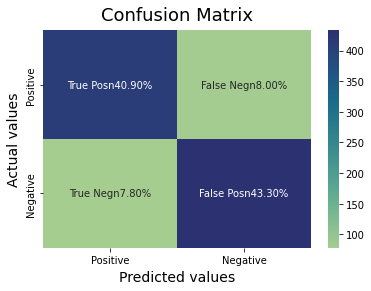

In [30]:
#Using TF-IDF Vectorized data
LRmodel.fit(X_train1, y_train)
model_Evaluate(LRmodel,X_test1)


              precision    recall  f1-score   support

 Not Sarcasm       0.84      0.85      0.85       489
     Sarcasm       0.86      0.84      0.85       511

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



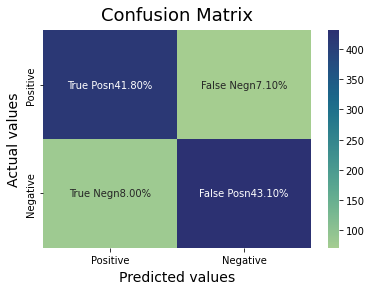

In [31]:
#Using Bag of N-grams Vectorized data
LRmodel.fit(X_train2, y_train)
model_Evaluate(LRmodel,X_test2)

#####Random Forest

In [33]:
RFmodel=RandomForestClassifier(n_estimators = 100)

              precision    recall  f1-score   support

 Not Sarcasm       0.75      0.85      0.80       489
     Sarcasm       0.83      0.73      0.78       511

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



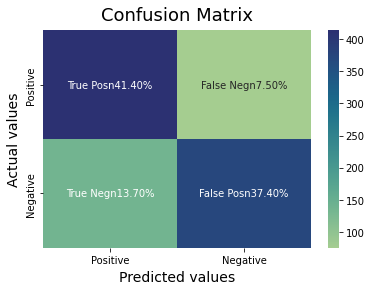

In [34]:
#Using TF-IDF Vectorized data
RFmodel.fit(X_train1, y_train)
model_Evaluate(RFmodel,X_test1)

              precision    recall  f1-score   support

 Not Sarcasm       0.84      0.77      0.81       489
     Sarcasm       0.80      0.86      0.83       511

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



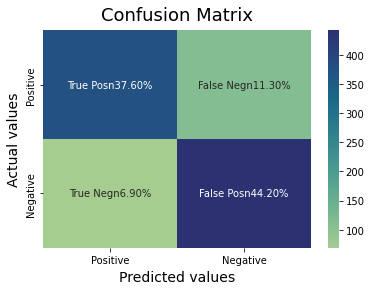

In [35]:
#Using Bag of N-grams Vectorized data
RFmodel.fit(X_train2, y_train)
model_Evaluate(RFmodel,X_test2)